<a href="https://colab.research.google.com/github/teju123540/BIG-DATA-ANALYTICSLAB/blob/main/BDAEXP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DIAGNOSTIC**


Number of loss-making orders: 735

Correlation Matrix:
             Sales  Quantity    Profit
Sales     1.000000 -0.006022  0.032133
Quantity -0.006022  1.000000  0.019923
Profit    0.032133  0.019923  1.000000


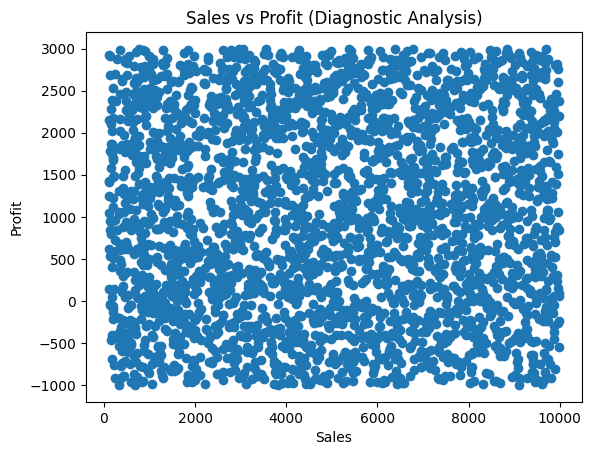

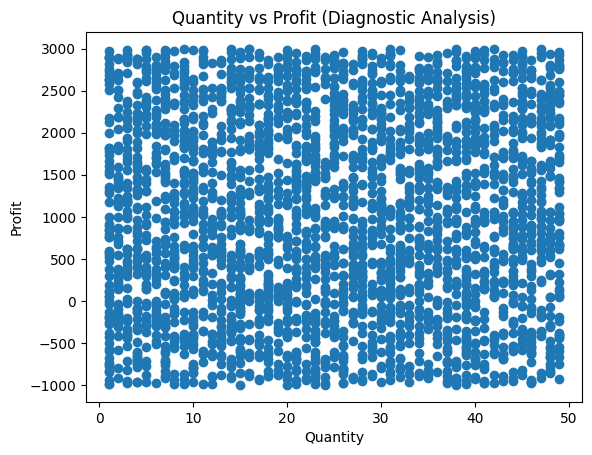


Lowest profit month: May
Profit in that month: 100916


In [ ]:
loss_orders = df[df['Profit'] < 0]
print("\nNumber of loss-making orders:", len(loss_orders))

diagnostic_cols = df[['Sales', 'Quantity', 'Profit']]
correlation = diagnostic_cols.corr()
print("\nCorrelation Matrix:")
print(correlation)

# Sales vs Profit
plt.figure()
plt.scatter(df['Sales'], df['Profit'])
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Sales vs Profit (Diagnostic Analysis)")
plt.show()

# Quantity vs Profit
plt.figure()
plt.scatter(df['Quantity'], df['Profit'])
plt.xlabel("Quantity")
plt.ylabel("Profit")
plt.title("Quantity vs Profit (Diagnostic Analysis)")
plt.show()

lowest_month = monthly_profit.idxmin()
print("\nLowest profit month:", lowest_month)
print("Profit in that month:", monthly_profit.min())


**DESCRIPTIVE**

First 5 rows of the dataset:
   OrderID                 Date   Region     Category SubCategory  Sales  \
0        1  2024-01-01 00:00:00     West     Clothing      Mobile   5227   
1        2  2024-01-01 01:00:00  Central        Books       Table   9098   
2        3  2024-01-01 02:00:00     East  Electronics      Laptop   2822   
3        4  2024-01-01 03:00:00  Central        Books       Chair   4756   
4        5  2024-01-01 04:00:00  Central    Furniture      Laptop   1425   

   Profit  Quantity CustomerType  PaymentMode  
0    2636        33    Returning  Credit Card  
1    2948        23          New       Wallet  
2    -460        13          New         Cash  
3      42        49          VIP          UPI  
4    -186        14          VIP         Cash  

DESCRIPTIVE STATISTICS FOR PROFIT (2024)
Mean Profit: 995.7216666666667
Median Profit: 953.5
Standard Deviation: 1144.5788721018932
Variance: 1310060.794462042

MONTH-WISE TOTAL PROFIT (2024)
Month
April       730799
February

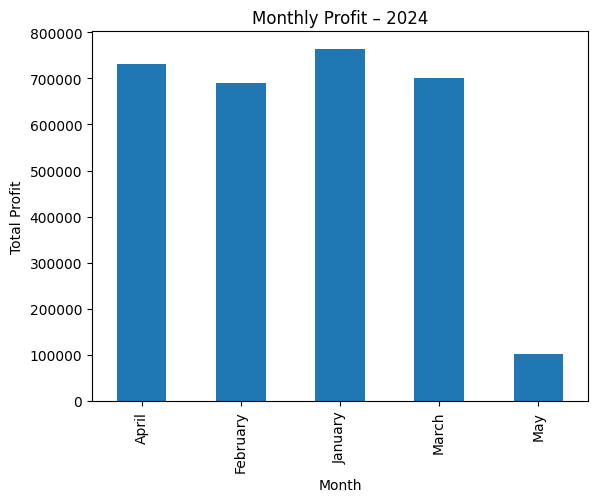


HIGHEST PROFIT MONTH (DESCRIPTIVE)
Month: January
Profit: 763909


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('large_sales_data.csv')

print("First 5 rows of the dataset:")
print(df.head())

df['Date'] = pd.to_datetime(df['Date'])


df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()


df_2024 = df[df['Year'] == 2024]


mean_profit = df_2024['Profit'].mean()
median_profit = df_2024['Profit'].median()
std_profit = df_2024['Profit'].std()
var_profit = df_2024['Profit'].var()

print("\nDESCRIPTIVE STATISTICS FOR PROFIT (2024)")
print("Mean Profit:", mean_profit)
print("Median Profit:", median_profit)
print("Standard Deviation:", std_profit)
print("Variance:", var_profit)


monthly_profit = df_2024.groupby('Month')['Profit'].sum()

print("\nMONTH-WISE TOTAL PROFIT (2024)")
print(monthly_profit)


plt.figure()
monthly_profit.plot(kind='bar')
plt.title('Monthly Profit – 2024')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.show()


highest_profit_month = monthly_profit.idxmax()
highest_profit_value = monthly_profit.max()

print("\nHIGHEST PROFIT MONTH (DESCRIPTIVE)")
print("Month:", highest_profit_month)
print("Profit:", highest_profit_value)

**PREDICTIVE**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


X = df[['Sales', 'Quantity']]
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Predicted Profits (first 10):")
print(y_pred[:10])

print("\nActual Profits (first 10):")
print(y_test.values[:10])

mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:", mse)

Predicted Profits (first 10):
[1050.26183609 1064.97072043 1071.72416701  990.10670866 1022.50042629
 1000.55649735 1007.79167468 1009.64745464  957.18560993  969.11850035]

Actual Profits (first 10):
[2068 -388 2813  846  295 2227 2949 1521 -310 -307]

Mean Squared Error: 1355304.803656541
